Start here to load a certain csv:

In [55]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

data = pd.read_csv("../csv_files/2_1_fabricio_iphone7_twitter.csv", encoding='latin-1')

In [56]:
# styling
plt.style.use('seaborn-darkgrid')
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
mpl.rcParams['text.color'] = 'white'
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.facecolor'] = 'gray'
mpl.rcParams['legend.edgecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'none'
mpl.rcParams['figure.edgecolor'] = 'black'
mpl.rcParams['figure.subplot.bottom'] = 0.125
mpl.rcParams['figure.subplot.top'] = 0.9
mpl.rcParams['figure.subplot.left'] = 0.125
mpl.rcParams['figure.subplot.right'] = 0.9
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace'] = 0.2
mpl.rcParams['figure.figsize'] = (15, 5)

In [57]:
data = data[~(data["Protocol"].isin(["MDNS", "ICMP", "DHCP", "NTP", "ARP"])|data['Protocol'].isna())]
data.shape
data["Protocol"].value_counts()

TCP        75439
TLSv1.3    12337
TLSv1.2      276
DNS          231
SSDP          56
SSLv2         37
HTTP          19
OCSP           3
Name: Protocol, dtype: int64

In [58]:
source = data["Destination"].value_counts().idxmax()
source

'10.133.135.131'

In [59]:
data.iloc[0]

No.                                   1993
Time                             74.940008
Source         Fabricios-MacBook-Pro.local
Destination                239.255.255.250
Protocol                              SSDP
Length                                 202
Info                  M-SEARCH * HTTP/1.1 
Name: 1992, dtype: object

A look at the outgoing packets:

<AxesSubplot:title={'center':'Outgoing packets'}, ylabel='Destination'>

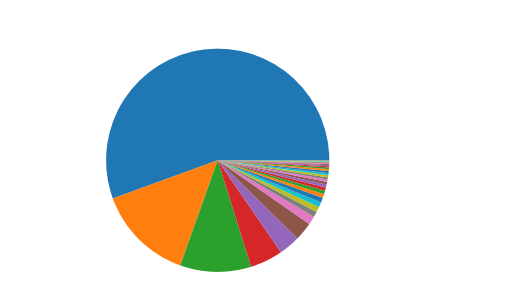

In [60]:
plt.title("Outgoing packets")
data["Destination"].value_counts().drop(source).plot.pie()

In [61]:
data["Destination"].value_counts().drop(source)

valid-apple.g.aaplimg.com                 8069
cs531.wpc.edgecastcdn.net                 2032
cs672.wac.edgecastcdn.net                 1494
probe-t.twitter.com                        690
e673.dsce9.akamaiedge.net                  446
tpop-api.twitter.com                       387
gateway.fe.apple-dns.net                   177
ns1.carleton.edu                           116
e673.dscx.akamaiedge.net                   113
e17437.dsct.akamaiedge.net                 105
gsp64-ssl.ls-apple.com.akadns.net          102
e3925.dscx.akamaiedge.net                   80
bag-smoot.v.aaplimg.com                     74
e10499.dsce9.akamaiedge.net                 68
doh.dns.apple.com.v.aaplimg.com             63
239.255.255.250                             56
connectivitycheck.gstatic.com               49
e1329.g.akamaiedge.net                      46
p48-buy-lb.itunes-apple.com.akadns.net      46
prd-uw2-journey-pcms.apple.com              43
ton.twitter.com                             43
17.57.144.245

<AxesSubplot:title={'center':'Outgoing packet addresses by total packet size'}, ylabel='Length'>

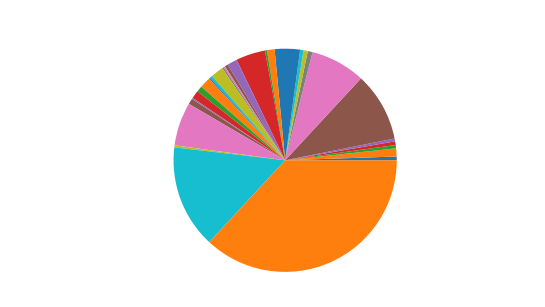

In [62]:
plt.title("Outgoing packet addresses by total packet size")
data["Length"].groupby(data["Destination"]).sum().drop(source).plot.pie()

A look at incoming packets:

<AxesSubplot:title={'center':'Incoming packets'}, ylabel='Source'>

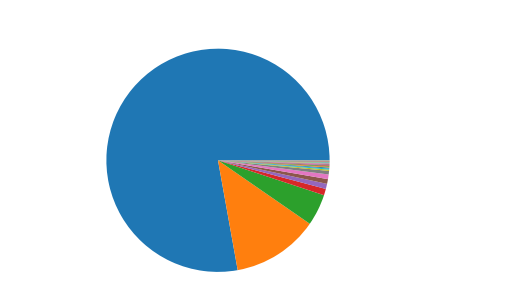

In [63]:
plt.title("Incoming packets")
data["Source"].value_counts().drop(source).plot.pie()

In [64]:
data["Source"].value_counts().drop(source)[:10]

valid-apple.g.aaplimg.com    57538
cs531.wpc.edgecastcdn.net     9276
cs672.wac.edgecastcdn.net     3374
probe-t.twitter.com            686
gateway.fe.apple-dns.net       553
e673.dsce9.akamaiedge.net      506
tpop-api.twitter.com           498
e3925.dscx.akamaiedge.net      377
e673.dscx.akamaiedge.net       136
ns1.carleton.edu               115
Name: Source, dtype: int64

<AxesSubplot:title={'center':'Incoming packet addresses by total packet size'}, ylabel='Length'>

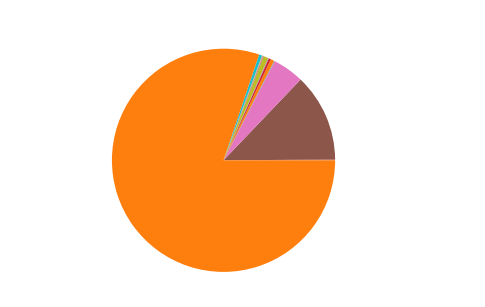

In [65]:
plt.title("Incoming packet addresses by total packet size")
data["Length"].groupby(data["Source"]).sum().drop(source).plot.pie()

<AxesSubplot:title={'center':'Protocol'}, ylabel='Protocol'>

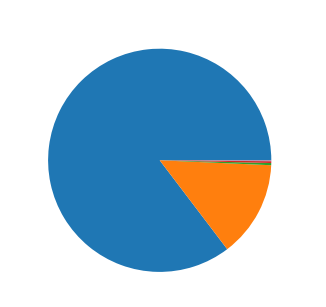

In [66]:
plt.title("Protocol")
data["Protocol"].value_counts().plot.pie()

<AxesSubplot:title={'center':'Protocols by total packet length'}, xlabel='Protocol'>

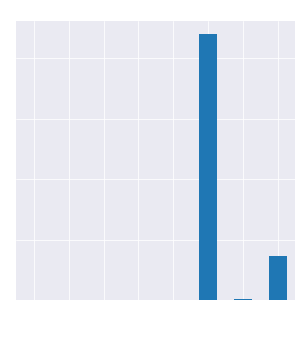

In [67]:
plt.title("Protocols by total packet length")
data["Length"].groupby(data["Protocol"]).sum().plot.bar()

<AxesSubplot:title={'center':'Average packet size of top 5 destinations'}, xlabel='Destination'>

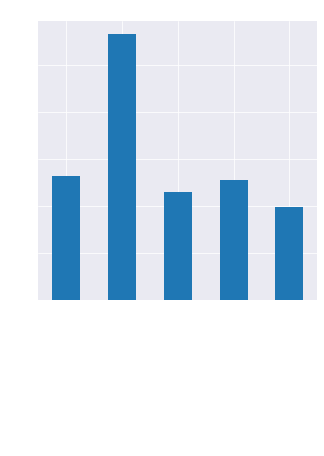

In [68]:
plt.title("Average packet size of top 5 destinations")
data["Length"].groupby(data["Destination"]).sum().drop(source)[:5].plot.bar()

In [69]:
# add new column host for ip host

def find_host(row):
    # find non-source ip address
    ip = str(row["Destination"] if row["Destination"] != source else row["Source"])

    # akamai
    if any(x in ip for x in ['google', 'gmail', '1e100']):
        return "Google"
    elif any(x in ip for x in ['amazon', 'aws']):
        return "Amazon"
    elif any(x in ip for x in ['apple', 'aapl']):
        return "Apple"
    elif any(x in ip for x in ['akamai', 'akadns']):
        return "Akamai"
    elif any(x in ip for x in ['facebook', 'akadns']):
        return "Facebook"
    else:
        return "other host"

data["Host"] = data.apply(find_host, axis=1)


In [70]:
data[data["Host"] == "other host"]

,No.,Time,Source,Destination,Protocol,Length,Info,Host
1992,1993,74.940008,Fabricios-MacBook-Pro.local,239.255.255.250,SSDP,202,M-SEARCH * HTTP/1.1,other host
2013,2014,75.950544,Fabricios-MacBook-Pro.local,239.255.255.250,SSDP,202,M-SEARCH * HTTP/1.1,other host
2033,2034,76.959301,Fabricios-MacBook-Pro.local,239.255.255.250,SSDP,202,M-SEARCH * HTTP/1.1,other host
2055,2056,77.970256,Fabricios-MacBook-Pro.local,239.255.255.250,SSDP,202,M-SEARCH * HTTP/1.1,other host
3473,3474,137.622731,10.133.135.131,ns1.carleton.edu,DNS,63,Standard query 0xa2a1 HTTPS doh.dns.apple.com,other host
...,...,...,...,...,...,...,...,...
124022,124023,1534.832325,10.133.135.131,17.57.144.245,TCP,40,64479 > hpvirtgrp(5223) [ACK] Seq=3634 Ack=1...,other host
126387,126388,1634.899623,Fabricios-MacBook-Pro.local,239.255.255.250,SSDP,202,M-SEARCH * HTTP/1.1,other host
126414,126415,1635.917301,Fabricios-MacBook-Pro.local,239.255.255.250,SSDP,202,M-SEARCH * HTTP/1.1,other host
126438,126439,1636.929670,Fabricios-MacBook-Pro.local,239.255.255.250,SSDP,202,M-SEARCH * HTTP/1.1,other host


<AxesSubplot:title={'center':'Number of packets by host'}, ylabel='Host'>

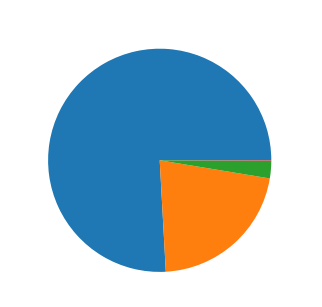

In [71]:
plt.title("Number of packets by host")
data["Host"].value_counts(dropna=False).plot.pie()

<AxesSubplot:title={'center':'Hosts by total packet size'}, ylabel='Length'>

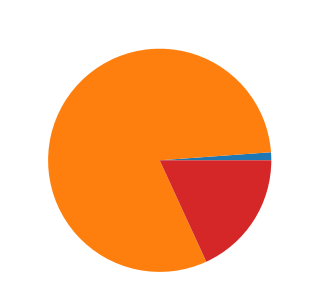

In [72]:
plt.title("Hosts by total packet size")
data["Length"].groupby(data["Host"]).sum().plot.pie()